# MOwNiT - laboratorium 2

## Autor: Tomasz Boroń

## Temat: Interpolacja

Funkcja początkowa:

$ f(x)=-2x*sin(3(x-1))$

Przedział

$ [-2\Pi+1, \Pi+1] $

## Importy

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from math import sin
from math import cos
from math import pi
from math import sqrt
from math import factorial
from statistics import mean
import numpy as np
from sys import version
from IPython.display import display, HTML
from scipy.misc import derivative

## Wersja Pythona

In [2]:
print(version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


## Funkcje

#### Zagadnienie Lagrange'a

In [3]:
def f(x):
    return -2*x*sin(3*(x-1))

In [4]:
def lagrange_polynomial(x,n,nodes):
    s = 0
    for k in range(n+1):
        Lk_x = 1
        for i in range(n+1):
            if i!=k: Lk_x=Lk_x*((x-nodes[i])/(nodes[k]-nodes[i]))
        s = s+Lk_x*f(nodes[k])
    return s

In [5]:
def equal_dist_nodes(a,b,n):
    return [a+x*(b-a)/n for x in range(n+1)]

In [6]:
def chebyshew_nodes(a,b,n):
    return [cos((2*x-1)*pi/(2*n))*((b-a)/2)+(a+b)/2 for x in range(1,n+1)]

In [7]:
def build_array(n,nodes):
    arr = []
    for i in range(n+1):
        arr.append([f(nodes[i])])
    for k in range(1,n+1):
        for i in range(n+1-k):
            arr[i+k].append((arr[i+k][k-1]-arr[i+k-1][k-1])/(nodes[i+k]-nodes[i]))
    coefficients=[]
    for i in range(n+1):
        coefficients.append(arr[i][-1])
    return coefficients

In [8]:
def newton_polynomial(x,n,nodes):
    coefficients = build_array(n,nodes)
    result = coefficients[n]
    for i in range(n,0,-1):
        result = result*(x-nodes[i-1])+coefficients[i-1]
    return result

#### Zagadnienie Hermite'a

In [9]:
def hermit_build_array(nodes, times):
    arr = []
    k = len(nodes)-1
    n = sum(times)-1
    for i in range(n+1):
        arr.append([])
    counter = 0
    for i in range(k+1):
        for j in range(times[i]):
            arr[counter].append(nodes[i])
            arr[counter].append(f(nodes[i]))
            counter+=1
    for i in range(1, n+1):
        for j in range(n+1-i):
            if arr[j+i][0] == arr[j][0]:
                arr[j+i].append(derivative(f,arr[j+i][0],dx=1e-8,n=i)/factorial(i))
            else:
                arr[j+i].append((arr[j+i][i]-arr[j+i-1][i])/(arr[j+i][0]-arr[j][0]))
    all_nodes = []
    result = []
    for i in range(n+1):
        all_nodes.append(arr[i][0])
        result.append(arr[i][-1])
    return all_nodes, result

In [10]:
def hermit(x,nodes,times):
    n = sum(times)-1
    new_nodes, coefficients = hermit_build_array(nodes,times)
    result = coefficients[0]
    for i in range(1,n+1):
        tmp = coefficients[i]
        prod = 1
        for j in range(i):
            prod = prod * (x-new_nodes[j])
        result = result + tmp*prod
    return result

## Program

#### Stałe

In [11]:
a = -2*pi+1
b = pi+1
n = 12

#### Węzły równoodległe

In [12]:
nodes_eq = equal_dist_nodes(a,b,n)

#### Węzły Czebyszewa

In [13]:
nodes_ch = chebyshew_nodes(a,b,n+1)

#### Obliczenia na podstawie stałych

In [14]:
# zageszczenie mozliwe do ustawienia, znajduje sie w trzech miejscach:
# tutaj
# podpunkt konfiguracja
# podpunkt animajce
# wszystkie trzy zmiany powinny dzialac niezaleznie dla kodu pomiedzy nimi
xs = [a+x*(b-a)/1000 for x in range(1001)]
func = [f(x) for x in xs]
lagrange_eq = [lagrange_polynomial(x,n,nodes_eq) for x in xs]
lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
newton_eq = [newton_polynomial(x,n,nodes_eq) for x in xs]
newton_ch = [newton_polynomial(x,n,nodes_ch) for x in xs]
nodes_func_eq = [f(x) for x in nodes_eq]
nodes_func_ch = [f(x) for x in nodes_ch]

## Dokładność

#### Odległość Czebyszewa i mediana odległości

In [15]:
def chebyshew_dist_and_median(xs,f,polynomial):
    dist = [abs(f[i]-polynomial[i]) for i in range(len(xs))]
    dist.sort()
    median_vals = dist[(len(xs)-1)//2:(len(xs)//2)+1]
    median = mean(median_vals)
    return max(dist), median

#### Błąd średniokwadratowy

In [16]:
def mse(xs,f,polynomial):
    components = [(f[i]-polynomial[i])**2 for i in range(len(xs))]
    return sqrt(sum(components))/len(xs)

#### Wzór Lagrange'a, równo rozłożone węzły

In [17]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,30):
    n = i
    nodes_eq = equal_dist_nodes(a,b,n)
    lagrange_eq = [lagrange_polynomial(x,n,nodes_eq) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,lagrange_eq)
    MSE = mse(xs,func,lagrange_eq)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 9.542379364 	 2.557430110 	 0.123750832
3 	 9.313188657 	 2.909432619 	 0.126515205
4 	 9.542379364 	 2.557430110 	 0.123750832
5 	 11.293394979 	 2.515221178 	 0.146232009
6 	 11.162456471 	 2.638204119 	 0.148790132
7 	 16.535516968 	 2.981814341 	 0.196862309
8 	 30.349793877 	 2.447403772 	 0.324104003
9 	 29.925149374 	 2.309019360 	 0.267464808
10 	 9.542379364 	 2.557430110 	 0.123750832
11 	 45.611302519 	 1.792814858 	 0.313337847
12 	 111.673872993 	 1.881051732 	 0.904795408
13 	 69.400062867 	 1.121898990 	 0.433507489
14 	 148.478581362 	 0.588620487 	 1.074696882
15 	 92.115724717 	 0.410272108 	 0.591757215
16 	 105.980151110 	 0.127541113 	 0.702537395
17 	 66.275607835 	 0.098734801 	 0.419578867
18 	 50.685152260 	 0.018927050 	 0.311686521
19 	 31.920120817 	 0.013337258 	 0.195065335
20 	 17.836434528 	 0.002154265 	 0.102746076
21 	 11.290071811 	 0.001728568 	 0.066264391
22 	 4.872648702 	 0.000192816 

#### Wzór Lagrange'a, węzły Czebyszewa

In [18]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,30):
    n = i
    nodes_ch = chebyshew_nodes(a,b,n+1)
    lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,lagrange_ch)
    MSE = mse(xs,func,lagrange_ch)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 17.603102894 	 2.590400906 	 0.218613883
3 	 14.599587172 	 2.341634306 	 0.176811268
4 	 13.069273387 	 1.763089576 	 0.153141579
5 	 9.168281497 	 2.573946258 	 0.119398024
6 	 11.088760221 	 2.440240736 	 0.158235941
7 	 9.519705470 	 3.277244353 	 0.144547479
8 	 10.564636423 	 2.469806515 	 0.129643093
9 	 10.103839440 	 2.081616797 	 0.122924793
10 	 5.405309361 	 1.798029964 	 0.078361528
11 	 5.637187074 	 1.642376447 	 0.073342815
12 	 4.945806828 	 1.236598932 	 0.061929371
13 	 4.512616588 	 0.904325111 	 0.056013128
14 	 2.827038358 	 1.028924151 	 0.042857933
15 	 2.524369554 	 0.765427415 	 0.037176649
16 	 1.026889335 	 0.408976721 	 0.016412928
17 	 0.848755828 	 0.361616323 	 0.014069281
18 	 0.264724368 	 0.096184539 	 0.004126742
19 	 0.197337352 	 0.098674490 	 0.003520065
20 	 0.050423986 	 0.017299663 	 0.000751377
21 	 0.034139045 	 0.018700046 	 0.000639246
22 	 0.007399025 	 0.002357651 	 0.000104979

#### Wzór Newtona, równo rozłożone węzły

In [19]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,30):
    n = i
    nodes_eq = equal_dist_nodes(a,b,n)
    newton_eq = [newton_polynomial(x,n,nodes_eq) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,newton_eq)
    MSE = mse(xs,func,newton_eq)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 9.542379364 	 2.557430110 	 0.123750832
3 	 9.313188657 	 2.909432619 	 0.126515205
4 	 9.542379364 	 2.557430110 	 0.123750832
5 	 11.293394979 	 2.515221178 	 0.146232009
6 	 11.162456471 	 2.638204119 	 0.148790132
7 	 16.535516968 	 2.981814341 	 0.196862309
8 	 30.349793877 	 2.447403772 	 0.324104003
9 	 29.925149374 	 2.309019360 	 0.267464808
10 	 9.542379364 	 2.557430110 	 0.123750832
11 	 45.611302519 	 1.792814858 	 0.313337847
12 	 111.673872993 	 1.881051732 	 0.904795408
13 	 69.400062867 	 1.121898990 	 0.433507489
14 	 148.478581362 	 0.588620487 	 1.074696882
15 	 92.115724717 	 0.410272108 	 0.591757215
16 	 105.980151110 	 0.127541113 	 0.702537395
17 	 66.275607834 	 0.098734801 	 0.419578867
18 	 50.685152260 	 0.018927050 	 0.311686521
19 	 31.920120817 	 0.013337258 	 0.195065335
20 	 17.836434528 	 0.002154265 	 0.102746076
21 	 11.290071807 	 0.001728568 	 0.066264391
22 	 4.872648702 	 0.000192816 

#### Wzór Newtona, węzły Czebyszewa

In [20]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,30):
    n = i
    nodes_ch = chebyshew_nodes(a,b,n+1)
    newton_ch = [newton_polynomial(x,n,nodes_ch) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,newton_ch)
    MSE = mse(xs,func,newton_ch)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 17.603102894 	 2.590400906 	 0.218613883
3 	 14.599587172 	 2.341634306 	 0.176811268
4 	 13.069273387 	 1.763089576 	 0.153141579
5 	 9.168281497 	 2.573946258 	 0.119398024
6 	 11.088760221 	 2.440240736 	 0.158235941
7 	 9.519705470 	 3.277244353 	 0.144547479
8 	 10.564636423 	 2.469806515 	 0.129643093
9 	 10.103839440 	 2.081616797 	 0.122924793
10 	 5.405309361 	 1.798029964 	 0.078361528
11 	 5.637187074 	 1.642376447 	 0.073342815
12 	 4.945806828 	 1.236598932 	 0.061929371
13 	 4.512616588 	 0.904325111 	 0.056013128
14 	 2.827038358 	 1.028924151 	 0.042857933
15 	 2.524369554 	 0.765427415 	 0.037176649
16 	 1.026889335 	 0.408976721 	 0.016412928
17 	 0.848755828 	 0.361616323 	 0.014069281
18 	 0.264724368 	 0.096184539 	 0.004126742
19 	 0.197337352 	 0.098674490 	 0.003520065
20 	 0.050423985 	 0.017299663 	 0.000751377
21 	 0.034139045 	 0.018700046 	 0.000639246
22 	 0.007399025 	 0.002357651 	 0.000104979

#### Zagadnienie Hermite'a, węzły równoodległe

Napisałem wersję dla dowolnej liczby pochodnych w węzłach, natomiast dla ujednolicenia zadania do dokładności użyłem zawsze funkcji oraz pierwszej pochodnej w każdym węźle.

In [21]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,20):
    n = i
    times = [2]*(n+1)
    hermit_eq = equal_dist_nodes(a,b,n)
    values_eq = [hermit(x,hermit_eq,times) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,values_eq)
    MSE = mse(xs,func,values_eq)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 36.740822842 	 15.893847301 	 0.618911522
3 	 22.868627516 	 4.300507730 	 0.288612327
4 	 32.559611701 	 4.352008399 	 0.410047394
5 	 16.332014166 	 2.401353269 	 0.192746888
6 	 44.885921205 	 3.142892845 	 0.486199048
7 	 66.995804924 	 1.094278054 	 0.638982102
8 	 46.834506669 	 0.249668986 	 0.406818790
9 	 21.299466085 	 0.035280204 	 0.171067569
10 	 7.076594204 	 0.005177757 	 0.053081810
11 	 1.825492009 	 0.000418958 	 0.012884515
12 	 0.379844897 	 0.000028316 	 0.002537337
13 	 0.065281039 	 0.000001720 	 0.000415108
14 	 0.009419623 	 0.000000114 	 0.000057285
15 	 0.001201170 	 0.000000013 	 0.000007529
16 	 0.001617409 	 0.000000013 	 0.000008958
17 	 0.004715296 	 0.000000008 	 0.000027485
18 	 0.011572798 	 0.000000007 	 0.000065653
19 	 0.067788427 	 0.000000021 	 0.000276283
20 	 0.136729312 	 0.000000011 	 0.000728098


#### Zagadnienie Hermite'a, węzły Czebyszewa

In [22]:
print("Węzłów\tOdl. Czebyszewa\tMediana odl.\tBłąd śreniokwadratowy")
for i in range(1,20):
    n = i
    times = [2]*(n+1)
    hermit_ch = chebyshew_nodes(a,b,n+1)
    values_ch = [hermit(x,hermit_ch,times) for x in xs]
    dist,med = chebyshew_dist_and_median(xs,func,values_ch)
    MSE = mse(xs,func,values_ch)
    print(n+1,"\t",'%.9f'%dist,"\t",'%.9f'%med,"\t",'%.9f'%MSE)

Węzłów	Odl. Czebyszewa	Mediana odl.	Błąd śreniokwadratowy
2 	 19.689593298 	 5.164451701 	 0.254528941
3 	 19.211086584 	 2.131815429 	 0.159540056
4 	 25.497030773 	 2.879499274 	 0.306469428
5 	 10.618845889 	 2.417405000 	 0.148047230
6 	 8.769779654 	 1.415207439 	 0.103799283
7 	 5.387326757 	 1.414592073 	 0.074174008
8 	 2.054100016 	 0.540861205 	 0.028360623
9 	 0.529448922 	 0.120793438 	 0.007130607
10 	 0.100848040 	 0.021301623 	 0.001298547
11 	 0.014797958 	 0.003081321 	 0.000181471
12 	 0.001705587 	 0.000295298 	 0.000020222
13 	 0.000159617 	 0.000030574 	 0.000001847
14 	 0.000012444 	 0.000002009 	 0.000000142
15 	 0.000001006 	 0.000000149 	 0.000000009
16 	 0.000000320 	 0.000000012 	 0.000000001
17 	 0.000000422 	 0.000000006 	 0.000000001
18 	 0.000001357 	 0.000000007 	 0.000000003
19 	 0.000001192 	 0.000000006 	 0.000000003
20 	 0.000003976 	 0.000000011 	 0.000000010


## Wielomian, który najlepiej przybliża funkcję

#### Dla zagadnienia Lagrange'a

Wielomian st. 29, z węzłami Czebyszewa

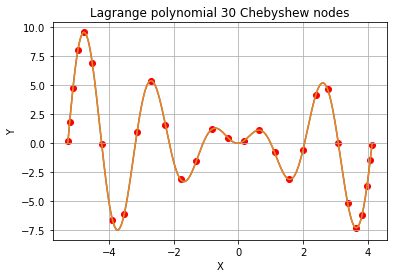

In [23]:
n = 29
nodes_ch = chebyshew_nodes(a,b,n+1)
lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
nodes_func_ch = [f(x) for x in nodes_ch]
text = "Lagrange polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,lagrange_ch)
plt.scatter(nodes_ch,nodes_func_ch,c='red')
plt.grid()
plt.show()

#### Dla zagadnienia Hermite'a

Wielomian st. 39 z węzłami Czebyszewa, pierwsza pochodna w każdym węźle

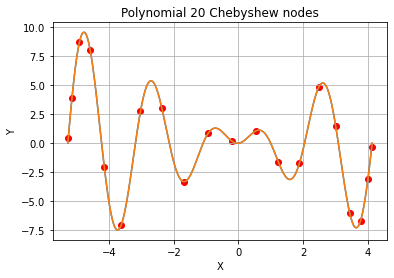

In [24]:
n = 19
times = [2]*(n+1)
hermit_ch = chebyshew_nodes(a,b,n+1)
values_ch = [hermit(x,hermit_ch,times) for x in xs]
nodes_func_ch = [f(x) for x in hermit_ch]
text = "Polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,values_ch)
plt.scatter(hermit_ch,nodes_func_ch,c='red')
plt.grid()
plt.show()

## Efekt Rungego

Największa rozbieżność pojawiła się przy wielomianie st. 13.

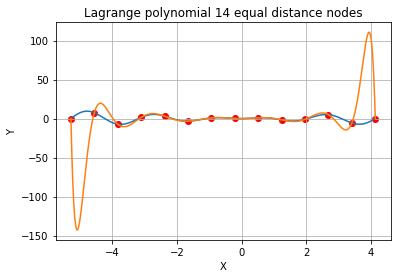

In [25]:
n = 13
nodes_eq = equal_dist_nodes(a,b,n)
lagrange_eq = [lagrange_polynomial(x,n,nodes_eq) for x in xs]
nodes_func_eq = [f(x) for x in nodes_eq]
text = "Lagrange polynomial "+str(n+1)+" equal distance nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,lagrange_eq)
plt.scatter(nodes_eq,nodes_func_eq,c='red')
plt.grid()
plt.show()

Ten sam stopień, korzystając z węzłów Czebyszewa

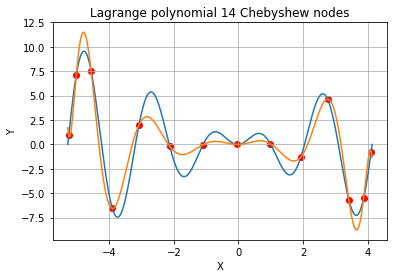

In [26]:
n = 13
nodes_ch = chebyshew_nodes(a,b,n+1)
lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
nodes_func_ch = [f(x) for x in nodes_ch]
text = "Lagrange polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,lagrange_ch)
plt.scatter(nodes_ch,nodes_func_ch,c='red')
plt.grid()
plt.show()

Dla zagadnienia Hermite'a i wielomianu stopnia 13.

Text(0.5, 1.0, 'Chebyshew nodes')

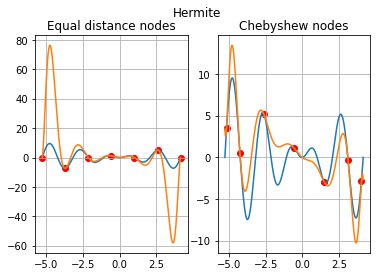

In [27]:
n = 6
times = [2]*(n+1)
hermit_eq = equal_dist_nodes(a,b,n)
hermit_ch = chebyshew_nodes(a,b,n+1)
values_eq = [hermit(x,hermit_eq,times) for x in xs]
values_ch = [hermit(x,hermit_ch,times) for x in xs]
nodes_h_eq = [f(x) for x in hermit_eq]
nodes_h_ch = [f(x) for x in hermit_ch]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hermite')
ax1.plot(xs,func)
ax1.plot(xs,values_eq)
ax1.scatter(hermit_eq,nodes_h_eq,c='red')
ax1.set_title('Equal distance nodes')
ax1.grid()
ax2.plot(xs,func)
ax2.plot(xs,values_ch)
ax2.scatter(hermit_ch,nodes_h_ch,c='red')
ax2.grid()
ax2.set_title('Chebyshew nodes')

## Wykresy

In [28]:
%matplotlib inline

#### Konfiguracja

In [29]:
n = 9
nodes_eq = equal_dist_nodes(a,b,n)
nodes_ch = chebyshew_nodes(a,b,n+1)
xs = [a+x*(b-a)/1000 for x in range(1001)]
func = [f(x) for x in xs]
lagrange_eq = [lagrange_polynomial(x,n,nodes_eq) for x in xs]
lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
newton_eq = [newton_polynomial(x,n,nodes_eq) for x in xs]
newton_ch = [newton_polynomial(x,n,nodes_ch) for x in xs]
nodes_func_eq = [f(x) for x in nodes_eq]
nodes_func_ch = [f(x) for x in nodes_ch]

times = [2]*(n+1)
hermit_eq = equal_dist_nodes(a,b,n)
hermit_ch = chebyshew_nodes(a,b,n+1)
values_eq = [hermit(x,hermit_eq,times) for x in xs]
values_ch = [hermit(x,hermit_ch,times) for x in xs]
nodes_h_eq = [f(x) for x in hermit_eq]
nodes_h_ch = [f(x) for x in hermit_ch]

#### Sama funkcja

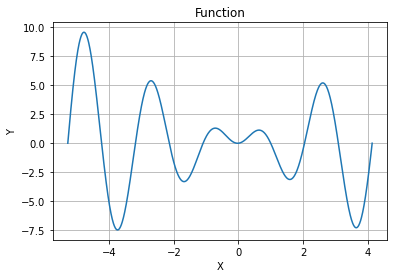

In [30]:
text = "Function"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.grid()
plt.show()

#### Funkcja + wielomian interpolujący

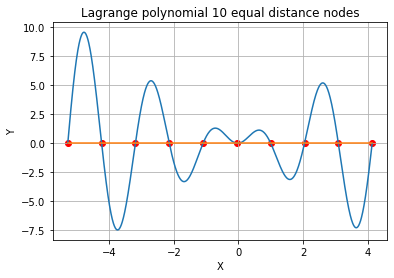

In [31]:
text = "Lagrange polynomial "+str(n+1)+" equal distance nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,lagrange_eq)
plt.scatter(nodes_eq,nodes_func_eq,c='red')
plt.grid()
plt.show()

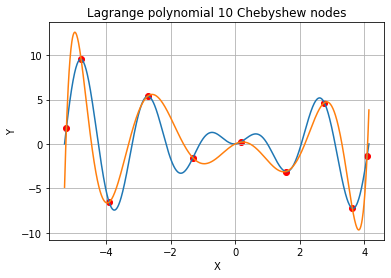

In [32]:
text = "Lagrange polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,lagrange_ch)
plt.scatter(nodes_ch,nodes_func_ch,c='red')
plt.grid()
plt.show()

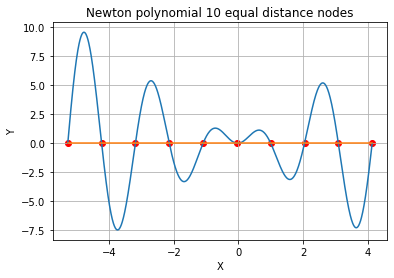

In [33]:
text = "Newton polynomial "+str(n+1)+" equal distance nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,newton_eq)
plt.scatter(nodes_eq,nodes_func_eq,c='red')
plt.grid()
plt.show()

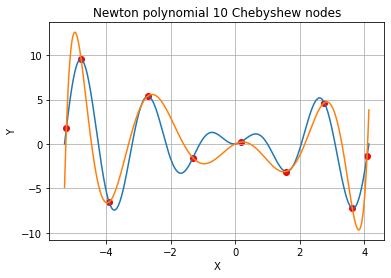

In [34]:
text = "Newton polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,newton_ch)
plt.scatter(nodes_ch,nodes_func_ch,c='red')
plt.grid()
plt.show()

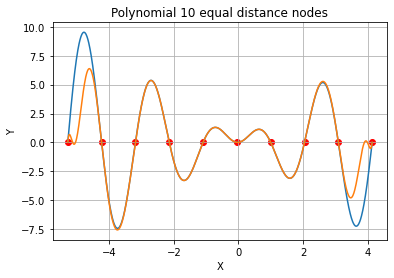

In [35]:
text = "Polynomial "+str(n+1)+" equal distance nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,values_eq)
plt.scatter(hermit_eq,nodes_h_eq,c='red')
plt.grid()
plt.show()

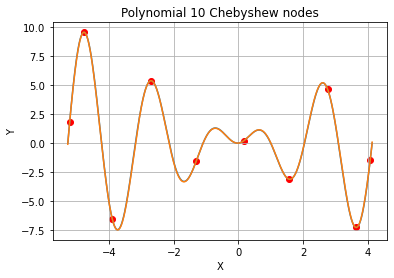

In [36]:
text = "Polynomial "+str(n+1)+" Chebyshew nodes"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,values_ch)
plt.scatter(hermit_ch,nodes_h_ch,c='red')
plt.grid()
plt.show()

## Animacje

Import potrzebny do animacji

###### Ważna informacja: Ten import powoduje popsucie się wykresów powyżej, jeśli chcemy je ponownie użyć tak jak poprzednio trzeba wrócić do opcji matplotlib inline, która znajduje się pod tytułem Wykresy

In [37]:
%matplotlib notebook

In [38]:
xs = [a+x*(b-a)/1000 for x in range(1001)]
func = [f(x) for x in xs]

<IPython.core.display.Javascript object>


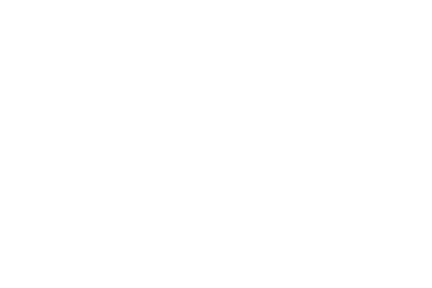

<IPython.core.display.Javascript object>


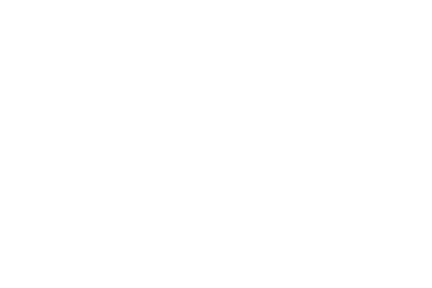

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [39]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    lagrange_eq = [lagrange_polynomial(x,n,nodes_eq) for x in xs]
    line, = ax.plot(xs,lagrange_eq)
    ax.grid()
    ax.set_title("Lagrange polynomial {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
# moze byc potrzebny dodatkowy install w celu uzyskania wersji video: conda install -c conda-forge ffmpeg
# jesli woli sie wersje bez instalowania prosze zakomentowac wszystkie linie z HTML(anim.to_html5_video()) 
# (lacznie jest 4 takie linie - ta i 3 ponizej)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


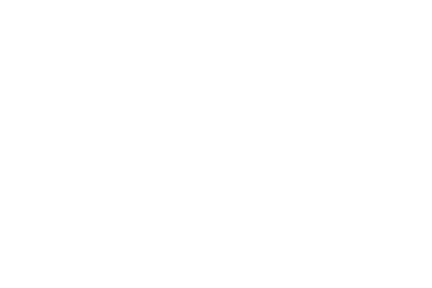

<IPython.core.display.Javascript object>


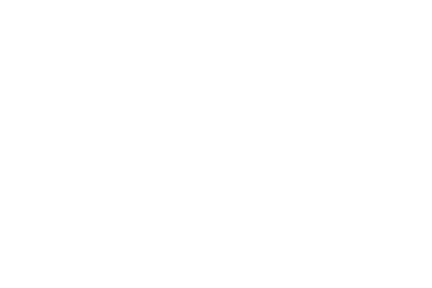

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [40]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_ch = chebyshew_nodes(a,b,n+1)
    nodes_func_ch = [f(x) for x in nodes_ch]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_ch,nodes_func_ch,color='red')
    lagrange_ch = [lagrange_polynomial(x,n,nodes_ch) for x in xs]
    line, = ax.plot(xs,lagrange_ch)
    ax.grid()
    ax.set_title("Lagrange polynomial {0} Chebyshew nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


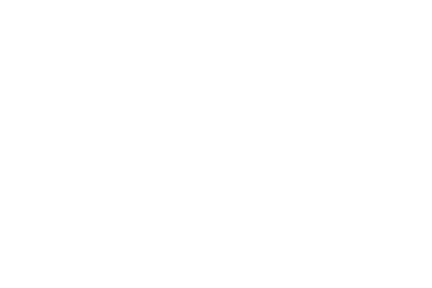

<IPython.core.display.Javascript object>


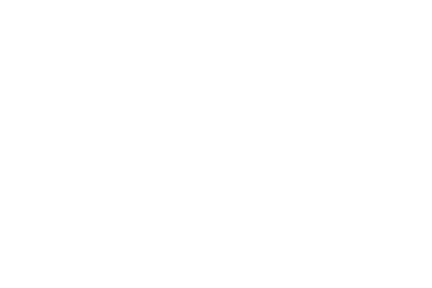

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [41]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_eq = equal_dist_nodes(a,b,n)
    nodes_func_eq = [f(x) for x in nodes_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_eq,nodes_func_eq,color='red')
    newton_eq = [newton_polynomial(x,n,nodes_eq) for x in xs]
    line, = ax.plot(xs,newton_eq)
    ax.grid()
    ax.set_title("Newton polynomial {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


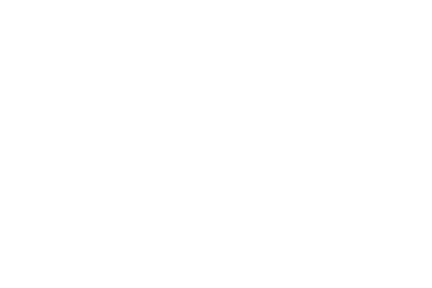

<IPython.core.display.Javascript object>


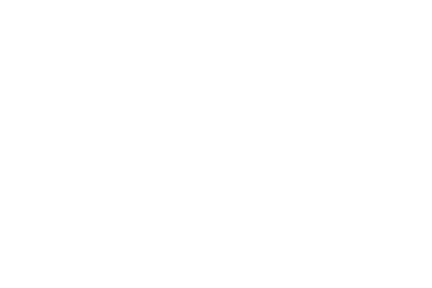

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [44]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    nodes_ch = chebyshew_nodes(a,b,n+1)
    nodes_func_ch = [f(x) for x in nodes_ch]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(nodes_ch,nodes_func_ch,color='red')
    newton_ch = [newton_polynomial(x,n,nodes_ch) for x in xs]
    line, = ax.plot(xs,newton_ch)
    ax.grid()
    ax.set_title("Newton polynomial {0} Chebyshew nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


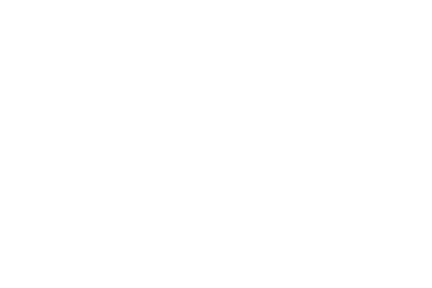

<IPython.core.display.Javascript object>


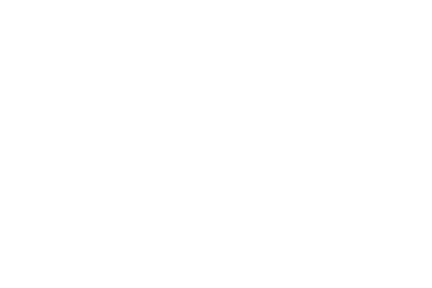

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [45]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    hermit_eq = equal_dist_nodes(a,b,n)
    hermit_func_eq = [f(x) for x in hermit_eq]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(hermit_eq,hermit_func_eq,color='red')
    times = [2]*(n+1)
    values_eq = [hermit(x,hermit_eq,times) for x in xs]
    line, = ax.plot(xs,values_eq)
    ax.grid()
    ax.set_title("Hermite, polynomial {0} equal distance nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
# moze byc potrzebny dodatkowy install w celu uzyskania wersji video: conda install -c conda-forge ffmpeg
# jesli woli sie wersje bez instalowania prosze zakomentowac wszystkie linie z HTML(anim.to_html5_video()) 
# (lacznie jest 4 takie linie - ta i 3 ponizej)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


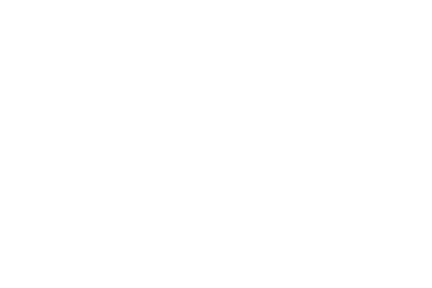

<IPython.core.display.Javascript object>


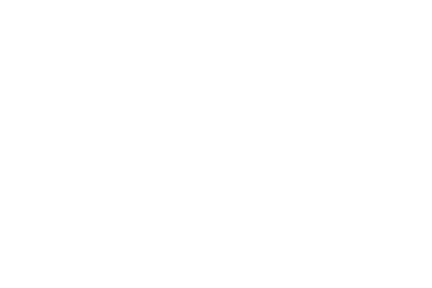

Traceback (most recent call last):
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Tomek\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [46]:
fig, ax = plt.subplots()
line, = ax.plot(xs,func)

def update(n):
    hermit_ch = chebyshew_nodes(a,b,n+1)
    hermit_func_ch = [f(x) for x in hermit_ch]
    ax.clear()
    ax.plot(xs,func)
    ax.scatter(hermit_ch,hermit_func_ch,color='red')
    times = [2]*(n+1)
    values_ch = [hermit(x,hermit_ch,times) for x in xs]
    line, = ax.plot(xs,values_ch)
    ax.grid()
    ax.set_title("Hermite, polynomial {0} Chebyshew nodes".format(n+1))
    return line,ax

anim = FuncAnimation(fig, update, frames=np.arange(2,20),interval=2000)
HTML(anim.to_html5_video())